# Autoencoder

In [17]:
import os
import numpy as np
import pandas as pd
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
import keras
from keras.layers import TimeDistributed

In [18]:
data = pd.read_csv('Data_March_X10_Y0.csv', index_col=0)
data.set_index('date',inplace=True)
train = data.iloc[0:416,]
test = data.iloc[416:,:]

In [19]:
train_price = train['price']
test_price = test['price']
train.drop(['price'], axis=1, inplace=True)
test.drop(['price'], axis=1, inplace=True)

/home/qhrong/.local/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
train_scaled = minmax_scale(train, axis = 0)
test_scaled = minmax_scale(test, axis = 0)

In [21]:
ncol = train.shape[1]
encoding_dim = 20

In [22]:
input_dim = Input(shape = (ncol, ))

In [23]:
input_dim

<tf.Tensor 'input_3:0' shape=(?, 66) dtype=float32>

In [24]:
# Encoder Layers
encoded1 = Dense(60, activation = 'relu')(input_dim)
encoded2 = Dense(50, activation = 'relu')(encoded1)
encoded3 = Dense(40, activation = 'relu')(encoded2)
encoded4 = Dense(30, activation = 'relu')(encoded3)
encoded5 = Dense(20, activation = 'relu')(encoded4)
encoded6 = Dense(10, activation = 'relu')(encoded5)
encoded7 = Dense(encoding_dim, activation = 'relu')(encoded6)

# Decoder Layers
decoded1 = Dense(10, activation = 'relu')(encoded7)
decoded2 = Dense(20, activation = 'relu')(decoded1)
decoded3 = Dense(30, activation = 'relu')(decoded2)
decoded4 = Dense(40, activation = 'relu')(decoded3)
decoded5 = Dense(50, activation = 'relu')(decoded4)
decoded6 = Dense(60, activation = 'relu')(decoded5)
decoded7 = Dense(ncol, activation = 'sigmoid')(decoded6)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded7)

In [25]:
# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'mse')

In [26]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 66)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 60)                4020      
_________________________________________________________________
dense_16 (Dense)             (None, 50)                3050      
_________________________________________________________________
dense_17 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_18 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_19 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                210 

In [27]:
autoencoder.fit(train,train, nb_epoch = 10, batch_size = 32, shuffle = False, validation_data = (test, test))

/home/qhrong/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 416 samples, validate on 97 samples
Epoch 1/10
416/416 [==============================] - 0s 1ms/step - loss: 985143.3846 - val_loss: 945736.0219
Epoch 2/10
416/416 [==============================] - 0s 93us/step - loss: 985060.5673 - val_loss: 945735.8338
Epoch 3/10
416/416 [==============================] - 0s 91us/step - loss: 985059.9663 - val_loss: 945727.2532
Epoch 4/10
416/416 [==============================] - 0s 97us/step - loss: 985051.6875 - val_loss: 945727.2113
Epoch 5/10
416/416 [==============================] - 0s 93us/step - loss: 985051.6731 - val_loss: 945727.2113
Epoch 6/10
416/416 [==============================] - 0s 87us/step - loss: 985051.6635 - val_loss: 945727.1907
Epoch 7/10
416/416 [==============================] - 0s 92us/step - loss: 985051.6587 - val_loss: 945727.1907
Epoch 8/10
416/416 [==============================] - 0s 96us/step - loss: 985051.6635 - val_loss: 945727.1907
Epoch 9/10
416/416 [==============================] - 0s 86us/step -

In [28]:
encoder = Model(inputs = input_dim, outputs = encoded7)
encoded_input = Input(shape = (encoding_dim, ))

In [29]:
encoded_train = pd.DataFrame(encoder.predict(train))
encoded_train = encoded_train.add_prefix('feature_')

encoded_test = pd.DataFrame(encoder.predict(test))
encoded_test = encoded_test.add_prefix('feature_')

In [30]:
print(encoded_train.shape)
encoded_train.to_csv('encoder_train.csv')

(416, 20)


In [31]:
encoded_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
0,81.687485,0.0,53.059879,302.905548,0.0,0.0,398.107574,0.0,0.0,36.896610,0.0,0.0,0.0,0.0,105.889229,0.0,0.0,0.0,0.0,0.0
1,82.002594,0.0,53.005325,302.765991,0.0,0.0,398.347717,0.0,0.0,36.843838,0.0,0.0,0.0,0.0,105.850189,0.0,0.0,0.0,0.0,0.0
2,81.991882,0.0,53.043579,303.066986,0.0,0.0,398.554230,0.0,0.0,36.862545,0.0,0.0,0.0,0.0,106.005363,0.0,0.0,0.0,0.0,0.0
3,81.699821,0.0,53.112942,302.933746,0.0,0.0,397.997681,0.0,0.0,36.841583,0.0,0.0,0.0,0.0,105.985397,0.0,0.0,0.0,0.0,0.0
4,81.825676,0.0,53.063267,303.029999,0.0,0.0,398.550140,0.0,0.0,36.957230,0.0,0.0,0.0,0.0,105.842346,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,87.328941,0.0,54.662003,330.640381,0.0,0.0,439.514099,0.0,0.0,43.245056,0.0,0.0,0.0,0.0,111.680946,0.0,0.0,0.0,0.0,0.0
412,87.295708,0.0,54.766853,331.097321,0.0,0.0,440.247864,0.0,0.0,43.432243,0.0,0.0,0.0,0.0,111.635735,0.0,0.0,0.0,0.0,0.0
413,87.190285,0.0,54.682507,331.655212,0.0,0.0,440.889343,0.0,0.0,43.615528,0.0,0.0,0.0,0.0,111.724930,0.0,0.0,0.0,0.0,0.0
414,87.202942,0.0,54.719681,331.589905,0.0,0.0,440.882874,0.0,0.0,43.617229,0.0,0.0,0.0,0.0,111.667671,0.0,0.0,0.0,0.0,0.0


# PCA

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

In [16]:
pca = PCA(n_components=3)
pca.fit(train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
(pca.explained_variance_ratio_)  

array([0.51465284, 0.28353852, 0.14734831])

In [37]:
# Visualize 3D PCA Results
result=pd.DataFrame(pca.transform(train), columns=['PCA%i' % i for i in range(3)], index=train.index)
#result=result.reset_index()
#result['date']=str([ele[0:4] for ele in result['date']])

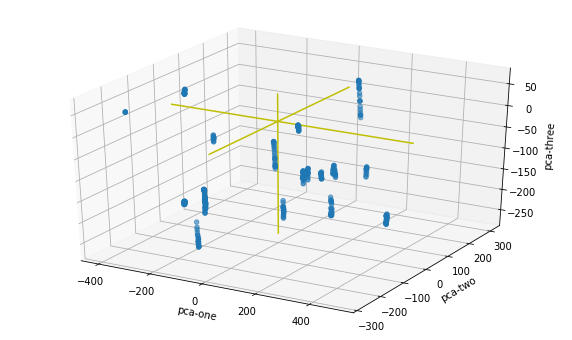

In [38]:
ax = plt.figure(figsize=(10,6)).gca(projection='3d')
ax.scatter(
    xs=result['PCA0'], 
    ys=result['PCA1'], 
    zs=result['PCA2'],
    #c=result['PCA0'],
    #cmap='tab10'
)
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'y')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'y')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'y')

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [20]:
# Normalize and reprocess PCA
from sklearn.preprocessing import normalize
train_normalized = pd.DataFrame(normalize(train))

In [34]:
pca.fit(train_normalized)
result_normalized=pd.DataFrame(pca.transform(train_normalized), 
                               columns=['PCA%i' % i for i in range(3)], index=train.index)

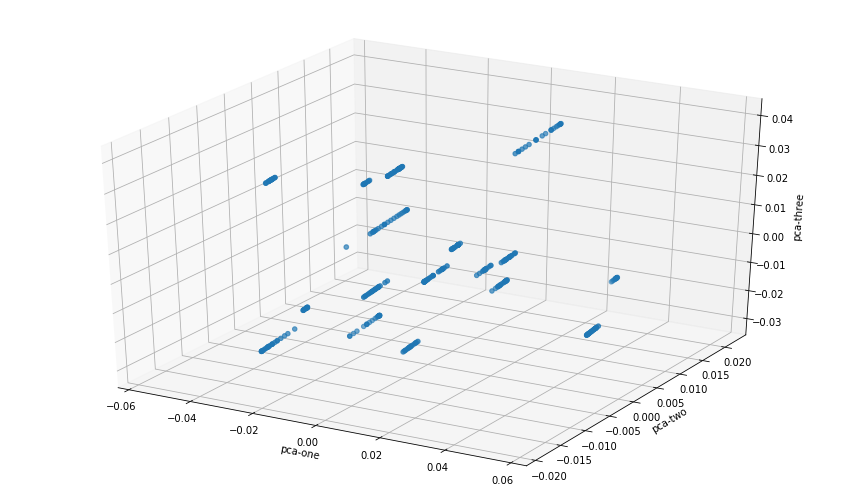

In [39]:
ax = plt.figure(figsize=(15,9)).gca(projection='3d')
ax.scatter(
    xs=result_normalized['PCA0'], 
    ys=result_normalized['PCA2'], 
    zs=result_normalized['PCA1']
    #c=result['PCA0'], 
    #cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# T-SNE

In [89]:
from sklearn.manifold import TSNE

In [99]:
train_embedded = TSNE(n_components=3).fit_transform(train)
train_embedded.shape

(416, 3)

In [100]:
result_tsne=pd.DataFrame(train_embedded, columns=['TSNE%i' % i for i in range(3)], index=train.index)

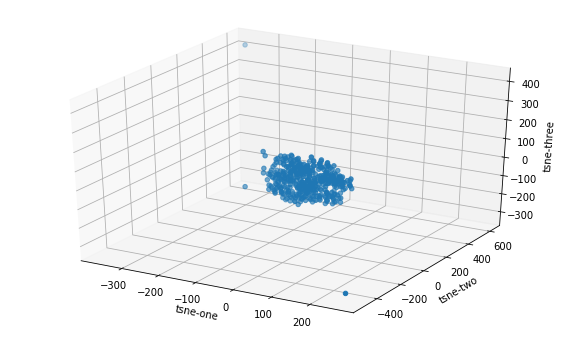

In [102]:
ax = plt.figure(figsize=(10,6)).gca(projection='3d')
ax.scatter(
    xs=result_tsne['TSNE0'], 
    ys=result_tsne['TSNE1'], 
    zs=result_tsne['TSNE2']
    #c=result['PCA0'], 
    #cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

TSNE is not sensible to scaling of data, but try to reprocess TSNE after normalization.

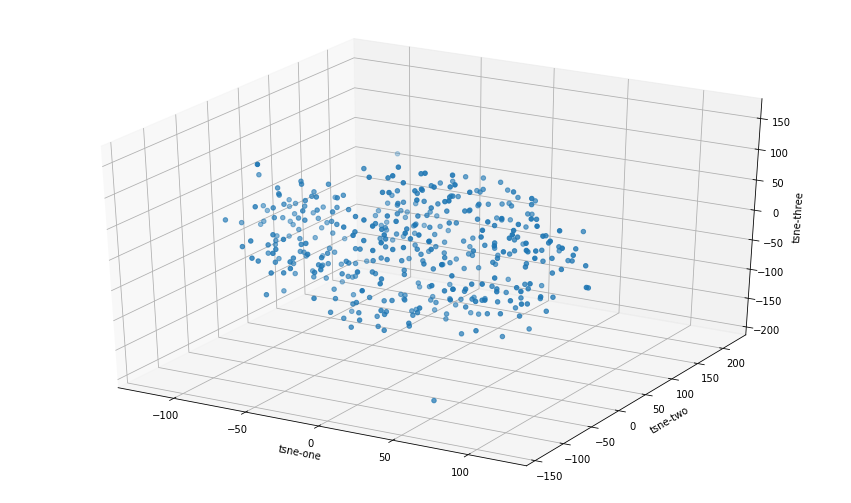

In [103]:
train_embedded_normalized = TSNE(n_components=3).fit_transform(train_normalized)
result_tsne_normalized=pd.DataFrame(train_embedded_normalized, columns=['TSNE%i' % i for i in range(3)], index=train.index)
ax = plt.figure(figsize=(15,9)).gca(projection='3d')
ax.scatter(
    xs=result_tsne_normalized['TSNE0'], 
    ys=result_tsne_normalized['TSNE1'], 
    zs=result_tsne_normalized['TSNE2']
    #c=result['PCA0'], 
    #cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()